## Gaussian Function
* https://en.wikipedia.org/wiki/Gaussian_function
* 1-D version

$$f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{\frac{-(x-\mu)^2}{2 \sigma^2 }}  $$

* 2-D version

$$f(x,y) = A \exp \left( - \left(a(x-x_0)^2 - 2b(x-x_0)(y-y_0) + c(y-y_0)^2 \right) \right) $$ 

The coefficient $A$ is the amplitude.

$$ M = \begin{bmatrix} a & b \\ b & c \end{bmatrix} $$
$M$ has to be positive definite.

$$ a = \frac{\cos^2 \theta}{2 \sigma_x^2} + \frac{\sin^2 \theta}{2 \sigma_y^2} $$

$$ b = - \frac{\sin 2 \theta}{4 \sigma_x^2} + \frac{\cos 2 \theta}{4 \sigma_y^2} $$

$$ c = \frac{\sin^2 \theta}{2 \sigma_x^2} + \frac{\cos^2 \theta}{2 \sigma_y^2} $$

* Multi-dimensional version
$$ f_X (x_1, ..., x_n) = \frac{\exp \left( - \frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^{\mathrm{T}} \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu}) \right)}{\sqrt{|2\pi \boldsymbol{\Sigma}|}} $$
$|\boldsymbol{\Sigma}| \equiv \det \boldsymbol{\Sigma}$ is the determinant of $\boldsymbol{\Sigma}$.

## Sigmoid (logistic) Function
* https://en.wikipedia.org/wiki/Logistic_function

$$ f(x) = \frac{L}{1 + e^{ -k (x - \mu) }} $$

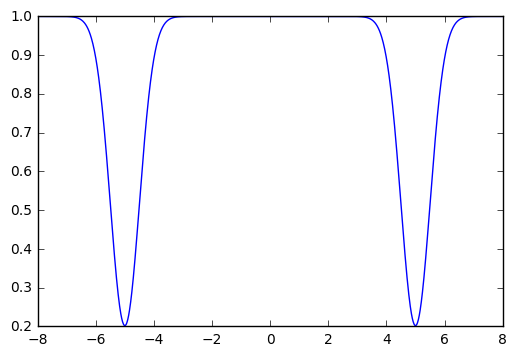

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

def gaussian(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) )

def logistic(x, mu, k, L):
    return L / (1 + np.exp(-k * (x - mu)))
    

x = np.arange(-8.0, 8.0, 0.01)
y = 1 - gaussian(x, -5, 0.5) - gaussian(x, 5, 0.5)
plt.plot(x, y)


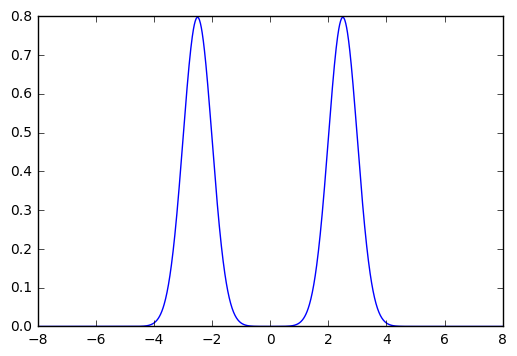

In [8]:
y = gaussian(x, -2.5, 0.5) + gaussian(x, 2.5, 0.5)
plt.plot(x, y)


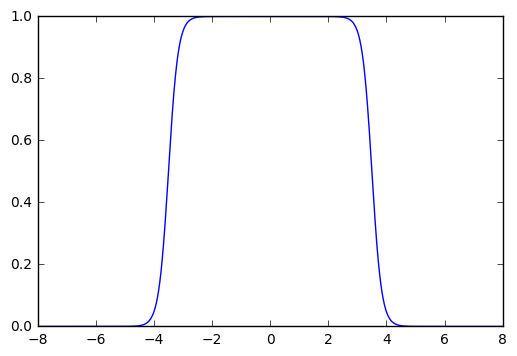

In [5]:
y = logistic(x, -5 + 1.5, 6, 1) - logistic(x, 5 - 1.5, 6, 1) 
plt.plot(x, y)


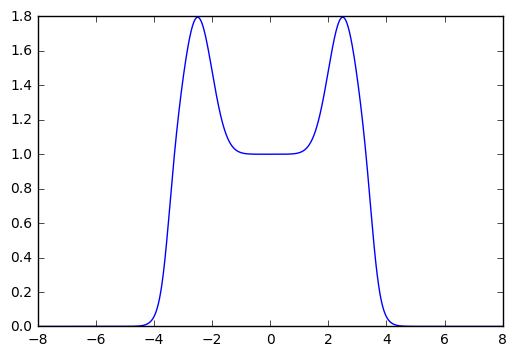

In [6]:
y = logistic(x, -5 + 1.5, 6, 1) - logistic(x, 5 - 1.5, 6, 1) + gaussian(x, -2.5, 0.5) + gaussian(x, 2.5, 0.5)
plt.plot(x, y)


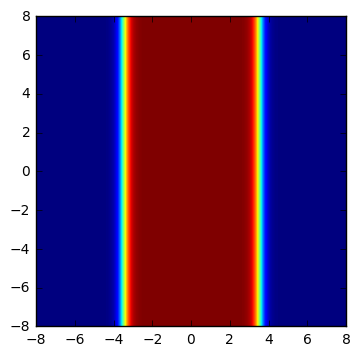

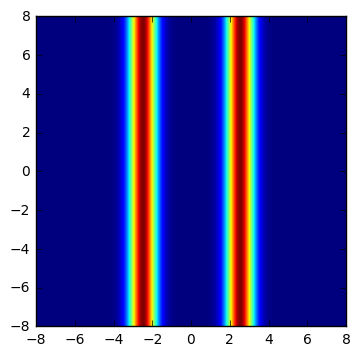

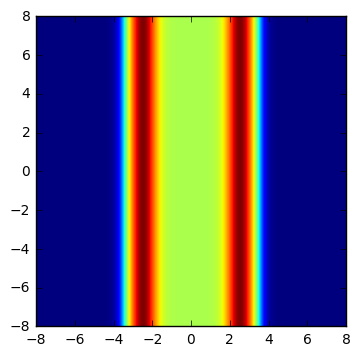

In [6]:
y = np.arange(-8.0, 8.0, 0.01)
xx, yy = np.meshgrid(x, y)

plt.figure()
z = logistic(xx, -5 + 1.5, 6, 1) - logistic(xx, 5 - 1.5, 6, 1) 
plt.imshow(z, extent=[-8,8,-8,8])

plt.figure()
z = gaussian(xx, -2.5, 0.5) + gaussian(xx, 2.5, 0.5)
plt.imshow(z, extent=[-8,8,-8,8])

plt.figure()
z = logistic(xx, -5 + 1.5, 6, 1) - logistic(xx, 5 - 1.5, 6, 1) + gaussian(xx, -2.5, 0.5) + gaussian(xx, 2.5, 0.5)
plt.imshow(z, extent=[-8,8,-8,8])

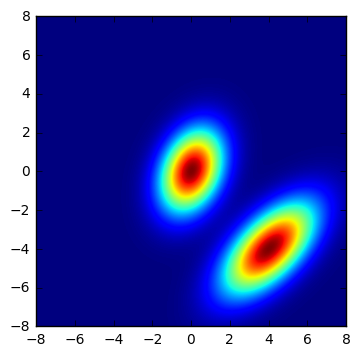

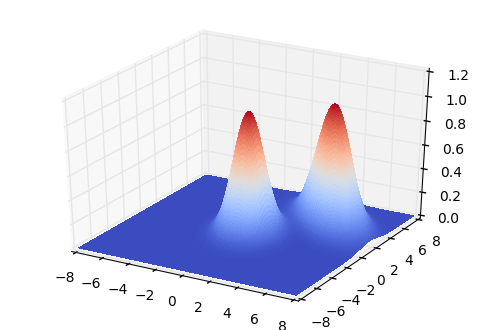

In [22]:
def two_dim_gaussian(xx, yy, theta, A, x0, y0, sigma_x, sigma_y):
    a = np.cos(theta)**2/(2*sigma_x**2) + np.sin(theta)**2/(2*sigma_y**2);
    b = -np.sin(2*theta)/(4*sigma_x**2) + np.sin(2*theta)/(4*sigma_y**2);
    c = np.sin(theta)**2/(2*sigma_x**2) + np.cos(theta)**2/(2*sigma_y**2);

    Z = A*np.exp( - (a*(xx-x0)**2 - 2*b*(xx-x0)*(yy-y0) + c*(yy-y0)**2)) ;
    return Z

Z = two_dim_gaussian(xx, yy, np.pi/8, 1, 0, 0, 1, 1.5) +  two_dim_gaussian(xx, yy, np.pi/4, 1, 4, 4, 1, 2)

plt.imshow(Z, extent=[-8,8,-8,8])

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.show()